# Explore The Data

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

# Import the data, which has been preliminarily processed. 

In [3]:
df = pd.read_csv('Lending Club Updated Version.csv')

In [3]:
# take a look the first 3 rows in the dataset 
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,35000.0,35000.0,35000.0,60 months,13.58%,806.79,C,C2,Security Officer,7 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,20000.0,20000.0,20000.0,36 months,5.31%,602.21,A,A1,Sr. Administrative Director,10+ years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7000.0,7000.0,7000.0,36 months,11.98%,232.44,B,B5,Parole,< 1 year,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Understand the structure of the dataset  
df.shape

(107864, 108)

# Numerical Features

## Subset the numerical features from dataset 

In [4]:
# Firstly, we should know that there are 88 features are numerical and 20 categorical features respectively.
df_type = pd.DataFrame(df.dtypes)
df_type.rename(columns={0:'data_type'},inplace=True)
df_type['data_type'].value_counts()

float64    88
object     20
Name: data_type, dtype: int64

In [5]:
# Subset the numerical columns
df_num = df.select_dtypes(include =['float64'])
df_num.shape

(107864, 88)

In [30]:
df_num.columns

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_b

## Check the correlations between these variables.

In [ ]:
# Generally, the default correlation coefficent of .corr() method is the Pearson correlation coefficient, which shows us how close to a 
# straight  line the data-point fall and is a number between -1 and 1. 

In [43]:
# At current stage, the high correlation variables should be paid attention.  
corr_matrix = df_num.corr().abs()
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                  .stack()
                  .sort_values(ascending=False))

In [45]:
sol.head(30)

loan_amnt                 funded_amnt                       1.000000
sec_app_fico_range_low    sec_app_fico_range_high           1.000000
fico_range_low            fico_range_high                   1.000000
loan_amnt                 funded_amnt_inv                   0.999996
funded_amnt               funded_amnt_inv                   0.999996
open_acc                  num_sats                          0.999464
num_actv_rev_tl           num_rev_tl_bal_gt_0               0.985972
tot_cur_bal               tot_hi_cred_lim                   0.981144
total_bal_il              total_il_high_credit_limit        0.949234
loan_amnt                 installment                       0.944942
funded_amnt               installment                       0.944942
funded_amnt_inv           installment                       0.944839
acc_now_delinq            num_tl_30dpd                      0.940527
total_bal_il              total_bal_ex_mort                 0.907411
mths_since_recent_bc_dlq  mths_sin

## Univariate Analysis

### Numerical Variables

In [6]:
# Two kinds of data types in the dataset
df.dtypes.value_counts()

float64    88
object     20
dtype: int64

In [7]:
# list all the numerical variables 
num_variables = df.select_dtypes(include=['float64']).columns
num_variables

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',
       'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il',
       'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc',
       'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_b

In [28]:
num_variables = list(num_variables)
len(list(num_variables))

88

### The first group

loan_amnt
mean is:  16147.94
std is:  10184.02
min is:  1000.0
max is:  40000.0
1% quantile value is: 1600.0
10% quantile value is: 5000.0
90% quantile value is: 32000.0
99% quantile value is: 40000.0


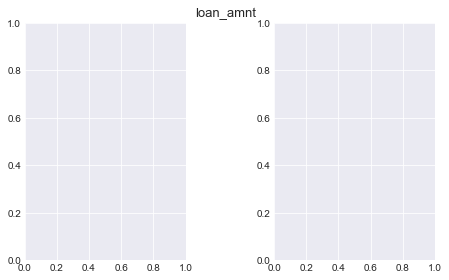

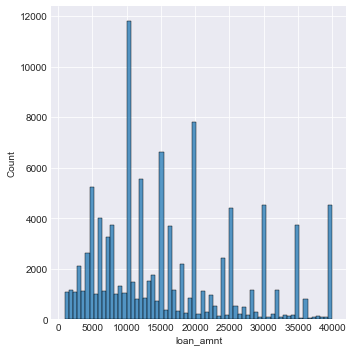

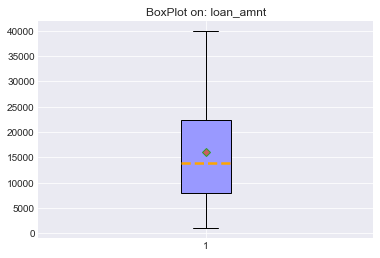

funded_amnt
mean is:  16147.94
std is:  10184.02
min is:  1000.0
max is:  40000.0
1% quantile value is: 1600.0
10% quantile value is: 5000.0
90% quantile value is: 32000.0
99% quantile value is: 40000.0


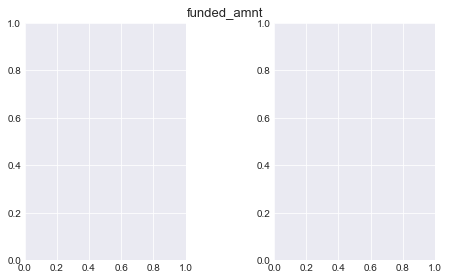

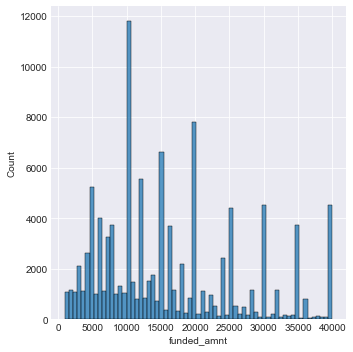

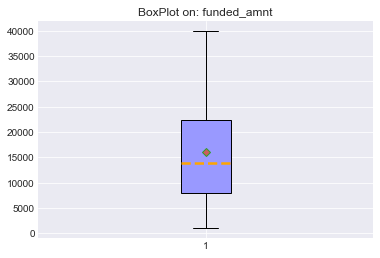

funded_amnt_inv
mean is:  16143.86
std is:  10182.88
min is:  1000.0
max is:  40000.0
1% quantile value is: 1600.0
10% quantile value is: 5000.0
90% quantile value is: 32000.0
99% quantile value is: 40000.0


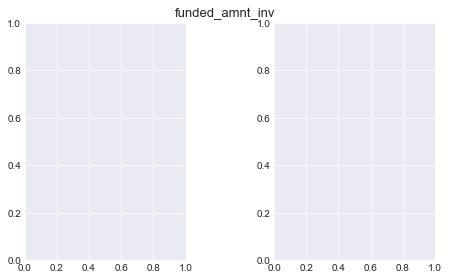

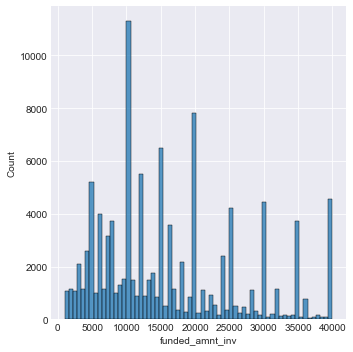

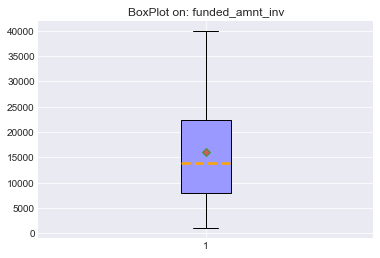

installment
mean is:  469.64
std is:  289.21
min is:  29.76
max is:  1618.03
1% quantile value is: 54.28
10% quantile value is: 160.01
90% quantile value is: 897.1799999999998
99% quantile value is: 1266.226199999999


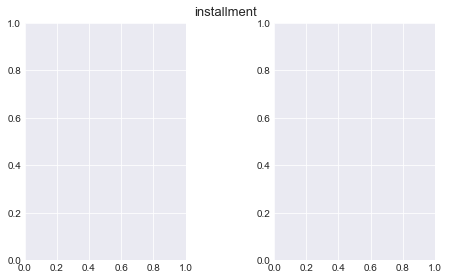

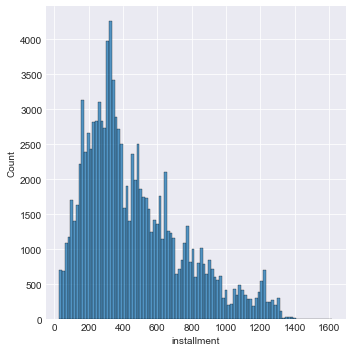

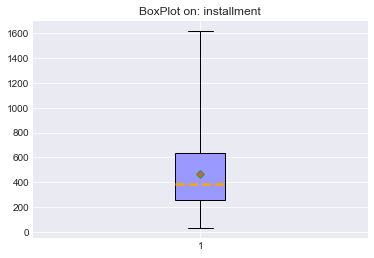

annual_inc
mean is:  78542.27
std is:  76874.36
min is:  0.0
max is:  8365188.0
1% quantile value is: 12607.560000000001
10% quantile value is: 32000.0
90% quantile value is: 135000.0
99% quantile value is: 283334.8499999958


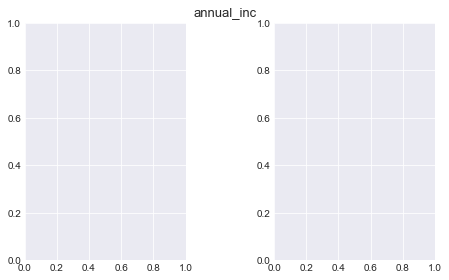

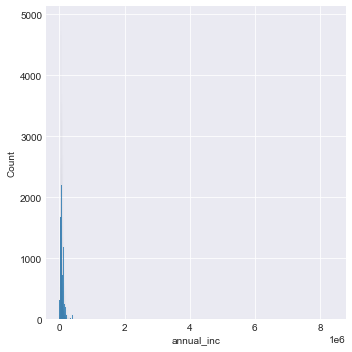

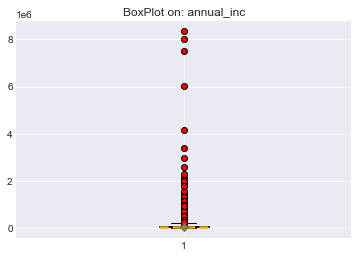

dti
mean is:  19.65
std is:  21.8
min is:  0.0
max is:  999.0
1% quantile value is: 1.0
10% quantile value is: 6.36
90% quantile value is: 32.32
99% quantile value is: 61.14970000000016


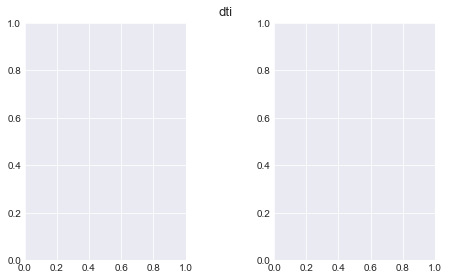

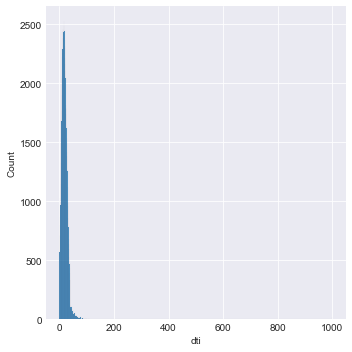

C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


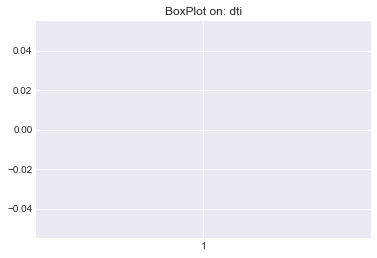

delinq_2yrs
mean is:  0.22
std is:  0.73
min is:  0.0
max is:  20.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 3.0


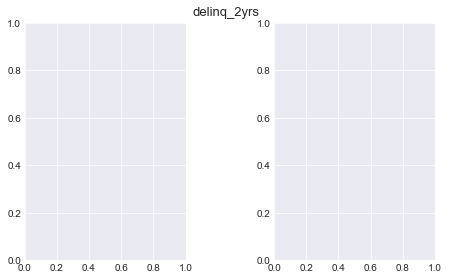

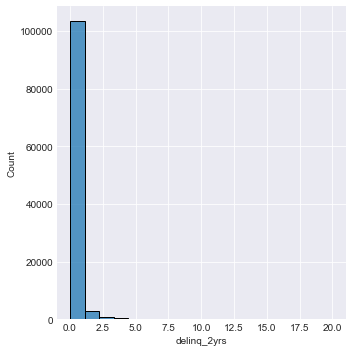

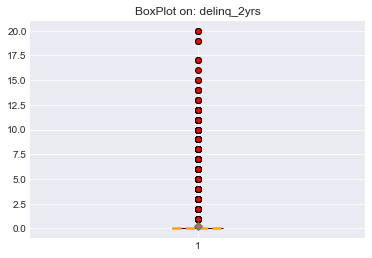

fico_range_low
mean is:  708.25
std is:  37.21
min is:  660.0
max is:  845.0
1% quantile value is: 660.0
10% quantile value is: 665.0
90% quantile value is: 760.0
99% quantile value is: 815.0


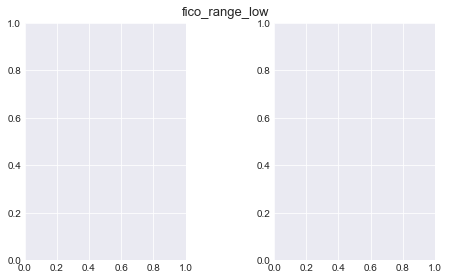

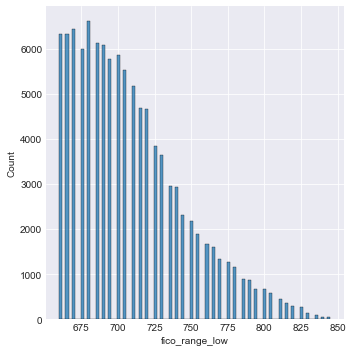

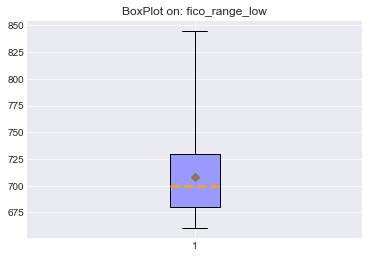

fico_range_high
mean is:  712.25
std is:  37.21
min is:  664.0
max is:  850.0
1% quantile value is: 664.0
10% quantile value is: 669.0
90% quantile value is: 764.0
99% quantile value is: 819.0


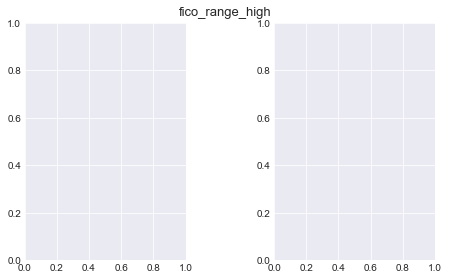

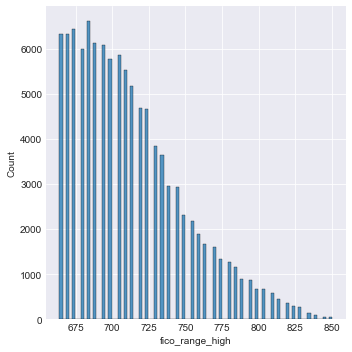

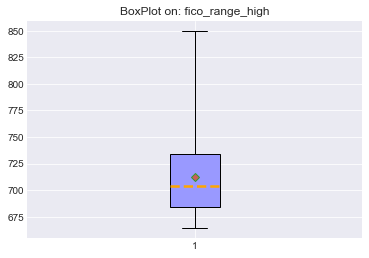

inq_last_6mths
mean is:  0.46
std is:  0.75
min is:  0.0
max is:  5.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 3.0


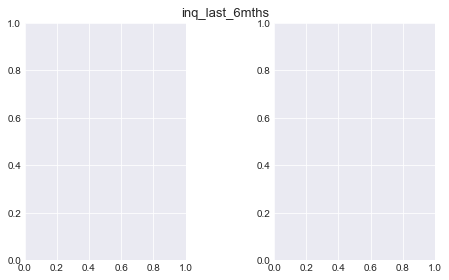

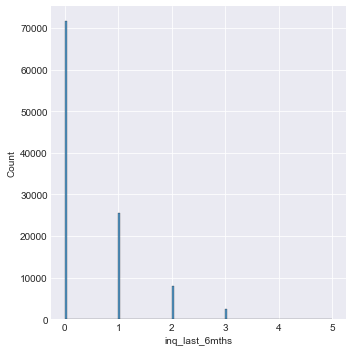

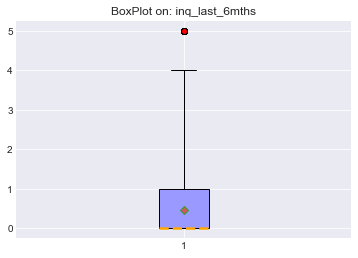

mths_since_last_delinq
mean is:  36.98
std is:  21.8
min is:  0.0
max is:  226.0
1% quantile value is: 3.0
10% quantile value is: 10.0
90% quantile value is: 69.0
99% quantile value is: 81.0


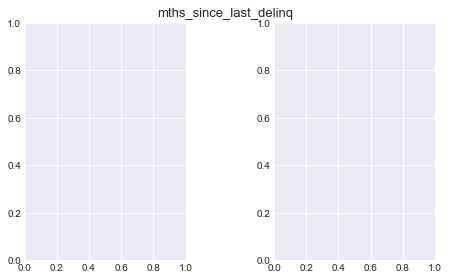

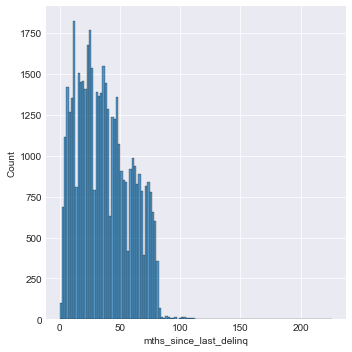

C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


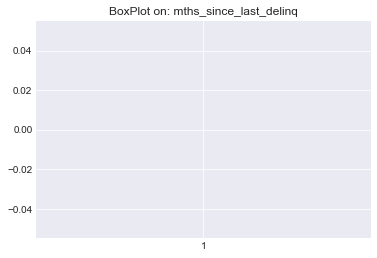

mths_since_last_record
mean is:  79.16
std is:  24.82
min is:  1.0
max is:  124.0
1% quantile value is: 10.0
10% quantile value is: 44.0
90% quantile value is: 108.0
99% quantile value is: 118.0


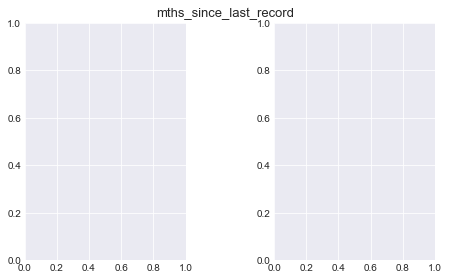

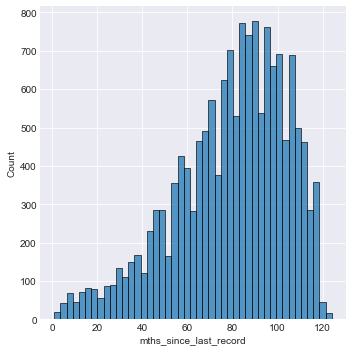

C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1211: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1218: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1226: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\rhoda\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1227: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],


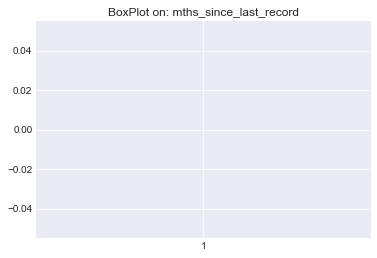

In [45]:


for col in num_variables[0:12]:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))

    
    plt.style.use('seaborn-darkgrid')
    fig, ax = plt.subplots(1, 2)
    ax = np.reshape(ax, (1, 2))
    fig.set_size_inches(6, 4)
    fig.subplots_adjust(wspace=.55, left=0.035, right=.985, top=.925, bottom=.1)
    fig.suptitle(col, fontsize=13)
    
    ax[0, 0]=sns.displot(df[col], label = "univariate analysis on: " + col)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show()
    
    ax[0, 1]= plt.boxplot(x = df[col],
                whis = 3,# set extreme ourlier x > Q3+3(Q3-Q1) & X < Q1-3(Q3-Q1)
                patch_artist=True, 
                showmeans=True, # mean: show with point
                boxprops = {'color':'black','facecolor':'#9999ff'}, #set box features
                flierprops = {'marker':'o','markerfacecolor':'red','color':'black'}, # outlier: show with o
                meanprops = {'marker':'D','markerfacecolor':'indianred'}, 
                medianprops = {'linestyle':'--', 'linewidth':2.5, 'color':'orange'}) # medium: show with line
    plt.tick_params(top='off', right='off')
    plt.title("BoxPlot on: " + col )
    plt.show()    
      

mths_since_last_record
mean is:  79.16
std is:  24.82
min is:  1.0
max is:  124.0
1% quantile value is: 10.0
10% quantile value is: 44.0
90% quantile value is: 108.0
99% quantile value is: 118.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


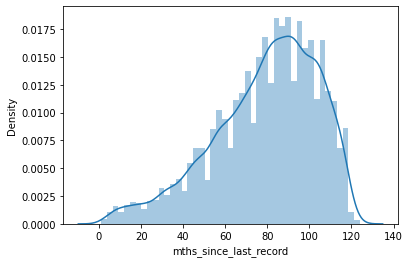


open_acc
mean is:  11.38
std is:  5.88
min is:  0.0
max is:  69.0
1% quantile value is: 2.0
10% quantile value is: 5.0
90% quantile value is: 19.0
99% quantile value is: 30.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


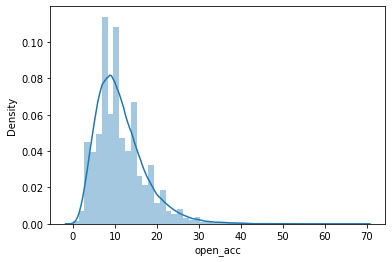


pub_rec
mean is:  0.16
std is:  0.49
min is:  0.0
max is:  52.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 2.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


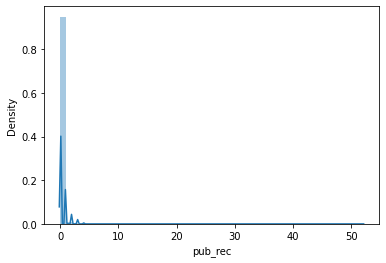


revol_bal
mean is:  16093.38
std is:  22176.26
min is:  0.0
max is:  925589.0
1% quantile value is: 0.0
10% quantile value is: 2055.0
90% quantile value is: 33423.0
99% quantile value is: 98626.31999999983


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


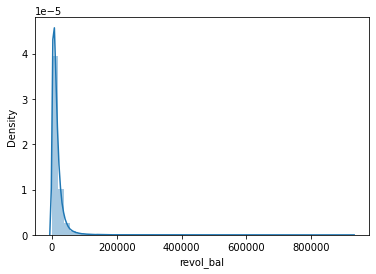


total_acc
mean is:  22.62
std is:  12.03
min is:  2.0
max is:  153.0
1% quantile value is: 4.0
10% quantile value is: 9.0
90% quantile value is: 39.0
99% quantile value is: 60.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


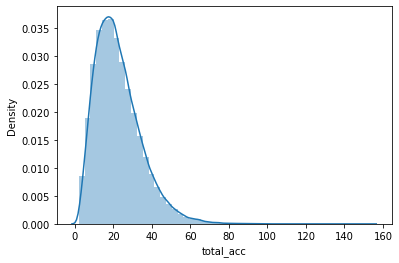


last_fico_range_high
mean is:  699.52
std is:  75.76
min is:  0.0
max is:  850.0
1% quantile value is: 499.0
10% quantile value is: 579.0
90% quantile value is: 789.0
99% quantile value is: 829.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


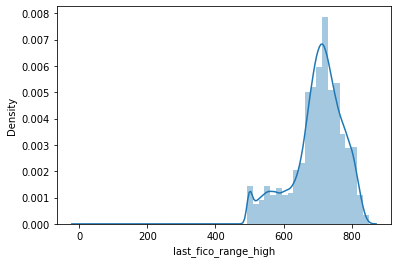


last_fico_range_low
mean is:  686.93
std is:  115.58
min is:  0.0
max is:  845.0
1% quantile value is: 0.0
10% quantile value is: 575.0
90% quantile value is: 785.0
99% quantile value is: 825.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


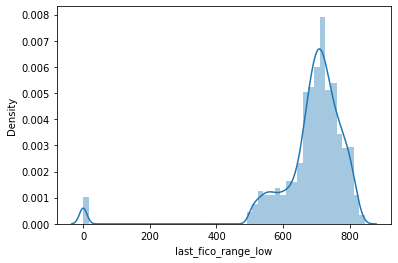


collections_12_mths_ex_med
mean is:  0.02
std is:  0.14
min is:  0.0
max is:  8.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


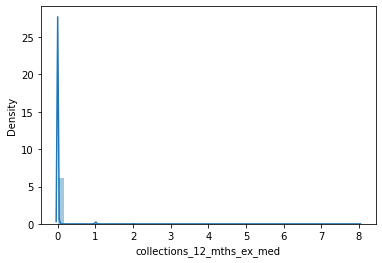


mths_since_last_major_derog
mean is:  46.19
std is:  21.56
min is:  0.0
max is:  226.0
1% quantile value is: 5.0
10% quantile value is: 16.0
90% quantile value is: 74.0
99% quantile value is: 94.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


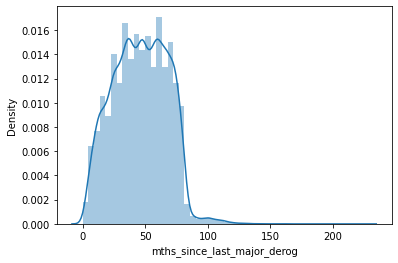


annual_inc_joint
mean is:  125506.63
std is:  66816.65
min is:  18000.0
max is:  1187000.0
1% quantile value is: 36000.0
10% quantile value is: 64600.0
90% quantile value is: 197140.0
99% quantile value is: 360000.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


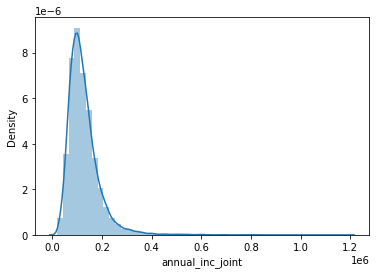


dti_joint
mean is:  19.66
std is:  8.04
min is:  0.0
max is:  39.98
1% quantile value is: 3.3850000000000007
10% quantile value is: 9.35
90% quantile value is: 30.61
99% quantile value is: 38.12700000000001


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


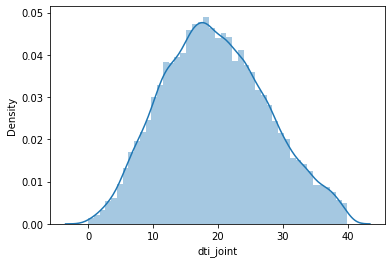


acc_now_delinq
mean is:  0.0
std is:  0.02
min is:  0.0
max is:  1.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 0.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


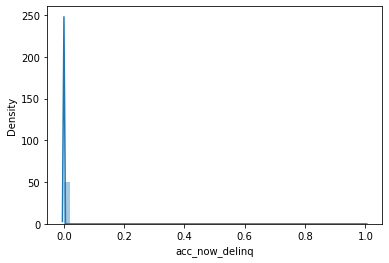


tot_coll_amt
mean is:  293.28
std is:  24813.19
min is:  0.0
max is:  6214661.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 174.0
99% quantile value is: 4128.849999999977


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


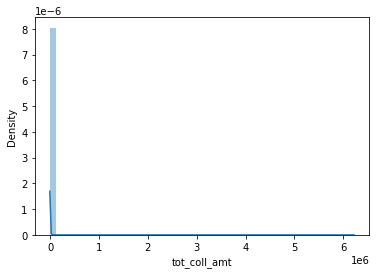


tot_cur_bal
mean is:  143763.18
std is:  167613.33
min is:  0.0
max is:  5752177.0
1% quantile value is: 1144.2600000000002
10% quantile value is: 11395.0
90% quantile value is: 359737.19999999995
99% quantile value is: 707740.8699999993


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


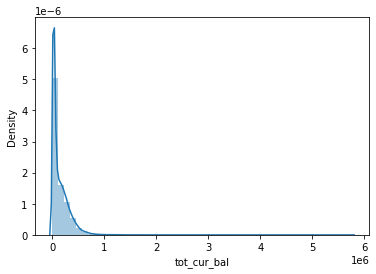


open_acc_6m
mean is:  0.9
std is:  1.12
min is:  0.0
max is:  12.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 2.0
99% quantile value is: 5.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


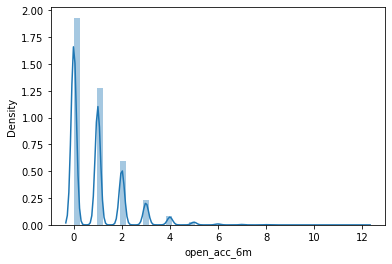

In [15]:
# The second group
continous_cols_2 =['mths_since_last_record','open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'last_fico_range_high','last_fico_range_low', 
                   'collections_12_mths_ex_med','mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint','acc_now_delinq', 
                   'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m']
for col in continous_cols_2:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    sns.distplot(df[col], label = "univariate analysis on: " + col)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show()
    print()            

In [ ]:
# The third group
continous_cols_3 =['mths_since_last_record','open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'last_fico_range_high','last_fico_range_low', 
                   'collections_12_mths_ex_med','mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint','acc_now_delinq', 
                   'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m']
for col in continous_cols_3:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    sns.distplot(df[col], label = "univariate analysis on: " + col)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show()
    print()        

open_act_il
mean is:  2.66
std is:  2.93
min is:  0.0
max is:  41.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 6.0
99% quantile value is: 15.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


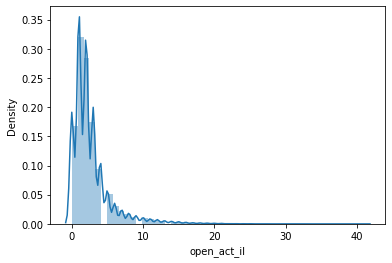


open_il_12m
mean is:  0.65
std is:  0.91
min is:  0.0
max is:  8.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 2.0
99% quantile value is: 4.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


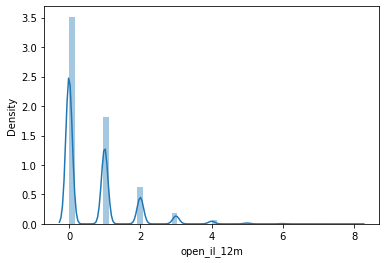


open_il_24m
mean is:  1.49
std is:  1.53
min is:  0.0
max is:  20.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 3.0
99% quantile value is: 7.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


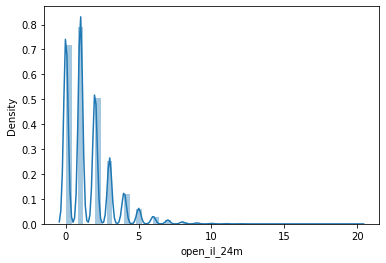


mths_since_rcnt_il
mean is:  21.7
std is:  26.54
min is:  0.0
max is:  507.0
1% quantile value is: 1.0
10% quantile value is: 4.0
90% quantile value is: 45.0
99% quantile value is: 139.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


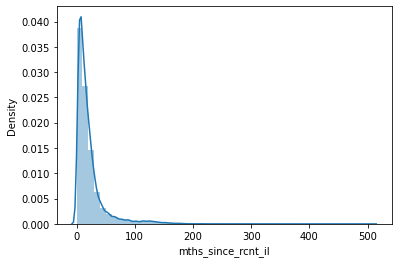


total_bal_il
mean is:  34560.49
std is:  44472.77
min is:  0.0
max is:  995545.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 80357.89999999998
99% quantile value is: 212716.3799999992


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


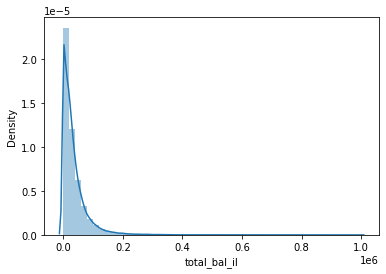


il_util
mean is:  67.61
std is:  24.14
min is:  0.0
max is:  1000.0
1% quantile value is: 6.0
10% quantile value is: 35.0
90% quantile value is: 95.0
99% quantile value is: 119.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


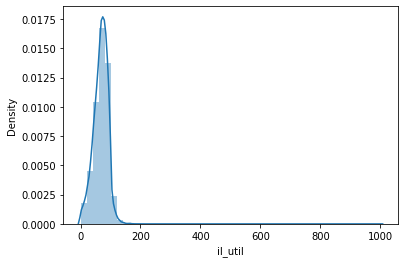


open_rv_12m
mean is:  1.22
std is:  1.47
min is:  0.0
max is:  19.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 3.0
99% quantile value is: 6.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


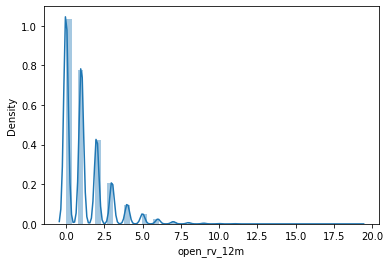


open_rv_24m
mean is:  2.6
std is:  2.53
min is:  0.0
max is:  38.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 6.0
99% quantile value is: 11.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


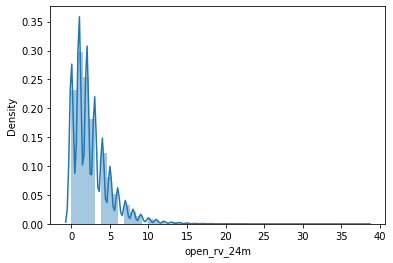


max_bal_bc
mean is:  5833.65
std is:  5589.52
min is:  0.0
max is:  199777.0
1% quantile value is: 0.0
10% quantile value is: 756.0
90% quantile value is: 12588.0
99% quantile value is: 25383.109999999986


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


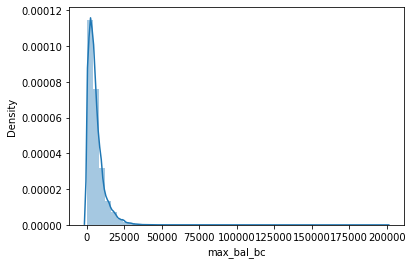


all_util
mean is:  53.55
std is:  21.45
min is:  0.0
max is:  239.0
1% quantile value is: 3.349999999999909
10% quantile value is: 25.0
90% quantile value is: 81.0
99% quantile value is: 100.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


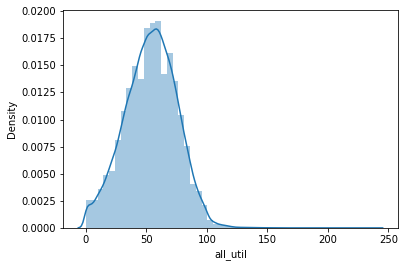


total_rev_hi_lim
mean is:  38353.03
std is:  36714.79
min is:  0.0
max is:  1123500.0
1% quantile value is: 2000.0
10% quantile value is: 8800.0
90% quantile value is: 77500.0
99% quantile value is: 174000.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


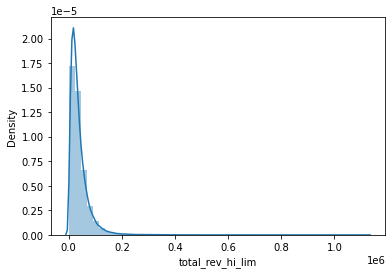


inq_fi
mean is:  1.05
std is:  1.49
min is:  0.0
max is:  38.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 3.0
99% quantile value is: 7.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


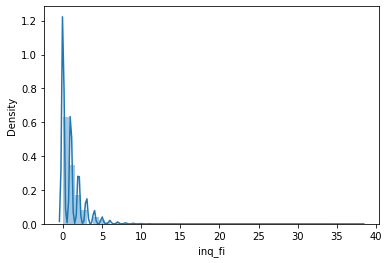


total_cu_tl
mean is:  1.46
std is:  2.63
min is:  0.0
max is:  52.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 4.0
99% quantile value is: 12.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


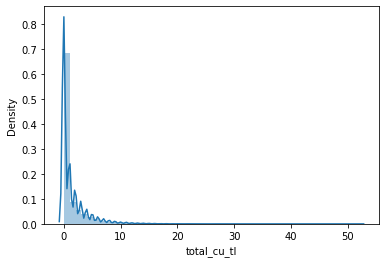


inq_last_12m
mean is:  1.95
std is:  2.37
min is:  0.0
max is:  46.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 5.0
99% quantile value is: 11.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


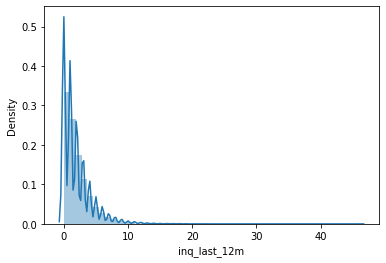


acc_open_past_24mths
mean is:  4.38
std is:  3.19
min is:  0.0
max is:  38.0
1% quantile value is: 0.0
10% quantile value is: 1.0
90% quantile value is: 9.0
99% quantile value is: 15.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


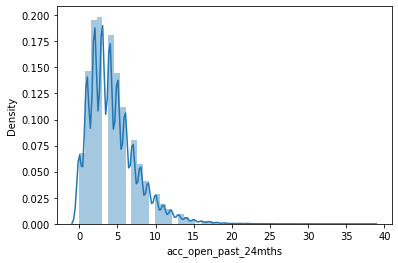


avg_cur_bal
mean is:  13884.26
std is:  17487.4
min is:  0.0
max is:  620531.0
1% quantile value is: 244.52999999999997
10% quantile value is: 1439.0
90% quantile value is: 34076.7
99% quantile value is: 78773.88


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


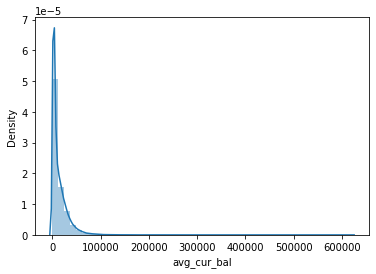


bc_open_to_buy
mean is:  15444.07
std is:  19828.81
min is:  0.0
max is:  469679.0
1% quantile value is: 35.0
10% quantile value is: 799.0
90% quantile value is: 38533.09999999999
99% quantile value is: 93665.23000000001


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


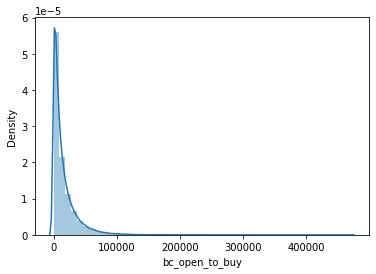


bc_util
mean is:  49.12
std is:  29.18
min is:  0.0
max is:  201.6
1% quantile value is: 0.0
10% quantile value is: 9.5
90% quantile value is: 91.1
99% quantile value is: 99.7


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


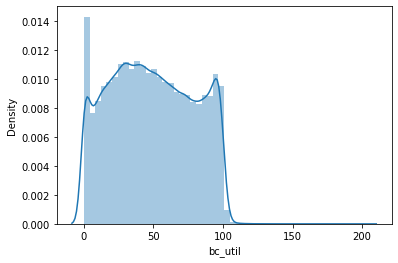


chargeoff_within_12_mths
mean is:  0.01
std is:  0.1
min is:  0.0
max is:  9.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 0.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


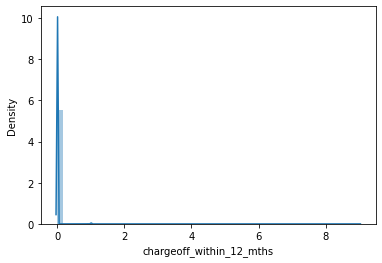


delinq_amnt
mean is:  3.56
std is:  324.83
min is:  0.0
max is:  65000.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 0.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


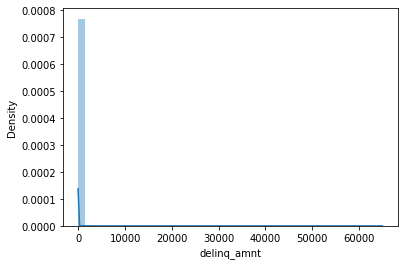


mo_sin_old_il_acct
mean is:  123.22
std is:  55.34
min is:  1.0
max is:  565.0
1% quantile value is: 10.0
10% quantile value is: 44.0
90% quantile value is: 180.0
99% quantile value is: 276.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


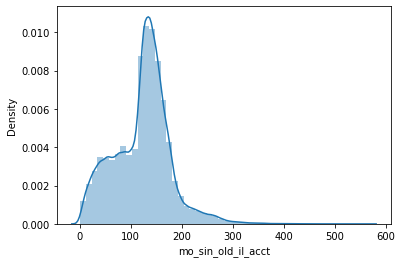


mo_sin_old_rev_tl_op
mean is:  179.98
std is:  101.22
min is:  1.0
max is:  817.0
1% quantile value is: 26.0
10% quantile value is: 61.0
90% quantile value is: 320.0
99% quantile value is: 489.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


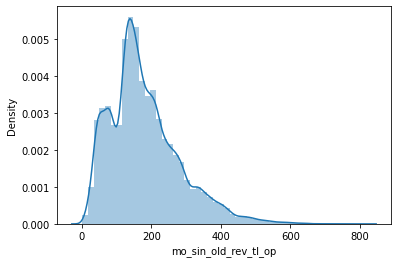


mo_sin_rcnt_rev_tl_op
mean is:  15.14
std is:  18.97
min is:  0.0
max is:  502.0
1% quantile value is: 0.0
10% quantile value is: 2.0
90% quantile value is: 34.0
99% quantile value is: 98.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


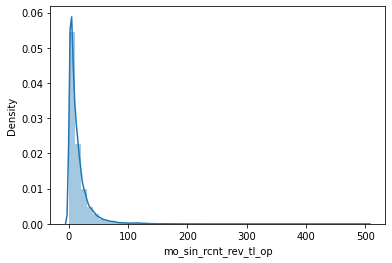


mo_sin_rcnt_tl
mean is:  8.76
std is:  9.77
min is:  0.0
max is:  368.0
1% quantile value is: 0.0
10% quantile value is: 2.0
90% quantile value is: 19.0
99% quantile value is: 44.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


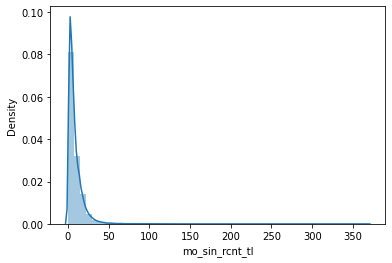


mort_acc
mean is:  1.39
std is:  1.75
min is:  0.0
max is:  46.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 4.0
99% quantile value is: 7.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


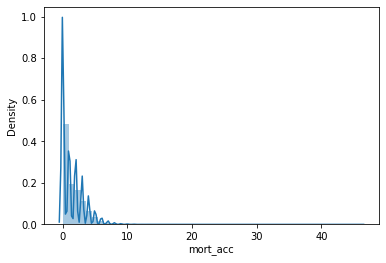


mths_since_recent_bc
mean is:  25.53
std is:  34.09
min is:  0.0
max is:  534.0
1% quantile value is: 1.0
10% quantile value is: 3.0
90% quantile value is: 59.0
99% quantile value is: 167.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


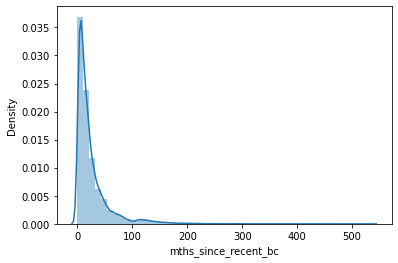


mths_since_recent_bc_dlq
mean is:  40.45
std is:  22.26
min is:  0.0
max is:  194.0
1% quantile value is: 3.0
10% quantile value is: 12.0
90% quantile value is: 72.0
99% quantile value is: 97.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


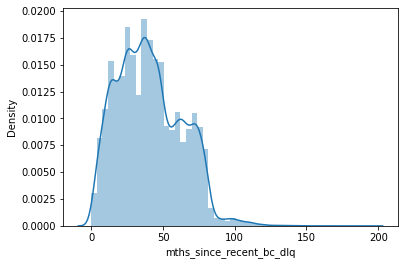

In [16]:
# The fourth group
continous_cols_4 =['open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il','total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 
                   'max_bal_bc','all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m','acc_open_past_24mths', 'avg_cur_bal',
                   'bc_open_to_buy', 'bc_util','chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct','mo_sin_old_rev_tl_op', 
                   'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl','mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq']
for col in continous_cols_4:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    sns.distplot(df[col], label = "univariate analysis on: " + col)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show()
    print()     

num_accts_ever_120_pd
mean is:  0.45
std is:  1.34
min is:  0.0
max is:  37.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 6.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


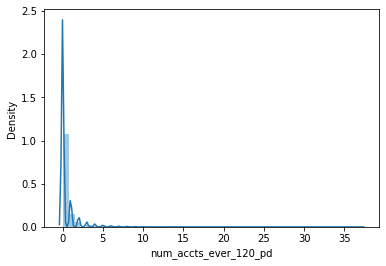


num_actv_bc_tl
mean is:  3.56
std is:  2.41
min is:  0.0
max is:  32.0
1% quantile value is: 0.0
10% quantile value is: 1.0
90% quantile value is: 7.0
99% quantile value is: 12.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


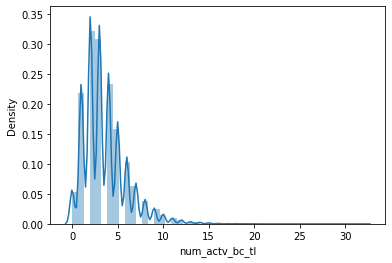


num_actv_rev_tl
mean is:  5.27
std is:  3.4
min is:  0.0
max is:  45.0
1% quantile value is: 0.0
10% quantile value is: 2.0
90% quantile value is: 10.0
99% quantile value is: 17.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


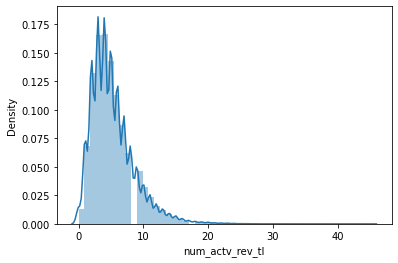


num_bc_sats
mean is:  4.83
std is:  3.2
min is:  0.0
max is:  48.0
1% quantile value is: 0.0
10% quantile value is: 2.0
90% quantile value is: 9.0
99% quantile value is: 16.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


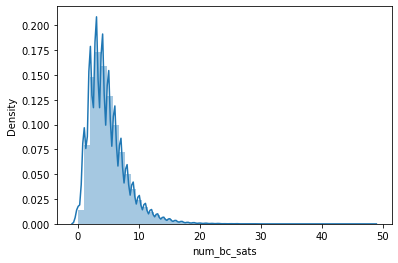


num_bc_tl
mean is:  7.2
std is:  4.57
min is:  0.0
max is:  86.0
1% quantile value is: 1.0
10% quantile value is: 2.0
90% quantile value is: 13.0
99% quantile value is: 22.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


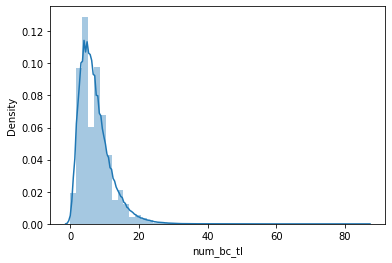


num_il_tl
mean is:  8.05
std is:  7.26
min is:  0.0
max is:  109.0
1% quantile value is: 0.0
10% quantile value is: 1.0
90% quantile value is: 17.0
99% quantile value is: 35.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


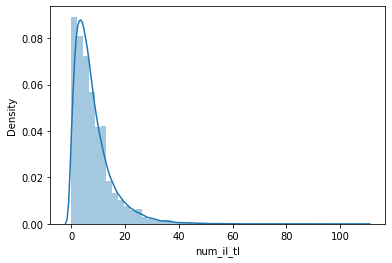


num_op_rev_tl
mean is:  8.06
std is:  4.88
min is:  0.0
max is:  68.0
1% quantile value is: 1.0
10% quantile value is: 3.0
90% quantile value is: 14.0
99% quantile value is: 24.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


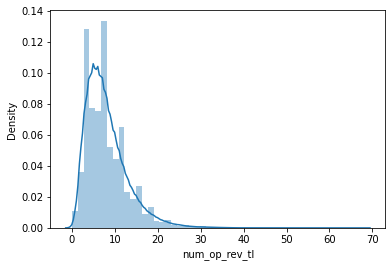


num_rev_accts
mean is:  12.97
std is:  7.89
min is:  2.0
max is:  151.0
1% quantile value is: 2.0
10% quantile value is: 5.0
90% quantile value is: 23.0
99% quantile value is: 39.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


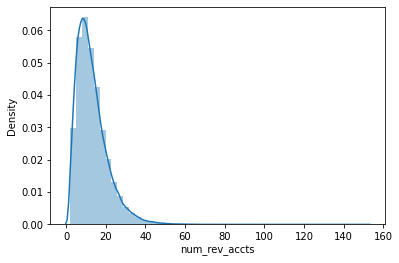


num_rev_tl_bal_gt_0
mean is:  5.21
std is:  3.31
min is:  0.0
max is:  45.0
1% quantile value is: 0.0
10% quantile value is: 2.0
90% quantile value is: 9.0
99% quantile value is: 16.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


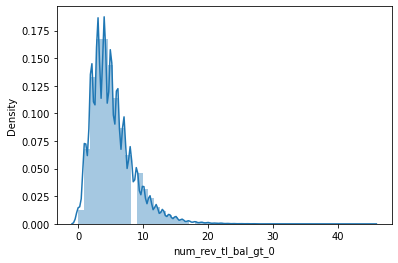


num_sats
mean is:  11.35
std is:  5.87
min is:  0.0
max is:  69.0
1% quantile value is: 2.0
10% quantile value is: 5.0
90% quantile value is: 19.0
99% quantile value is: 30.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


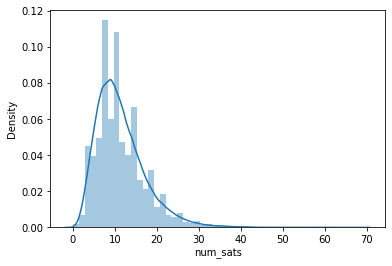


num_tl_30dpd
mean is:  0.0
std is:  0.01
min is:  0.0
max is:  1.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 0.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


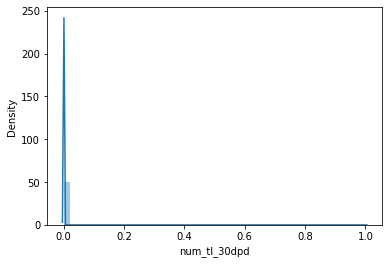


num_tl_90g_dpd_24m
mean is:  0.06
std is:  0.4
min is:  0.0
max is:  19.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


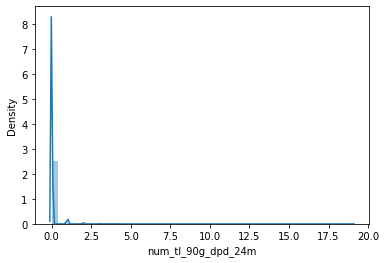


num_tl_op_past_12m
mean is:  2.0
std is:  1.86
min is:  0.0
max is:  20.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 4.0
99% quantile value is: 8.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


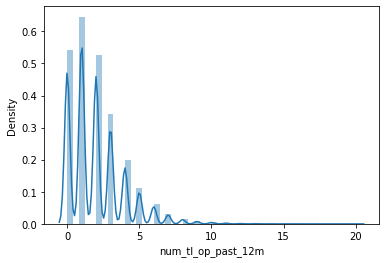


pct_tl_nvr_dlq
mean is:  94.66
std is:  9.04
min is:  0.0
max is:  100.0
1% quantile value is: 60.0
10% quantile value is: 83.3
90% quantile value is: 100.0
99% quantile value is: 100.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


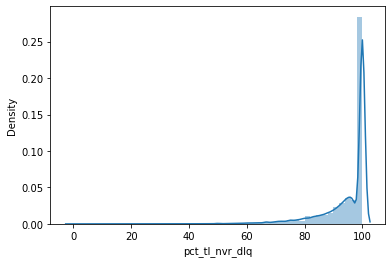


percent_bc_gt_75
mean is:  32.45
std is:  34.9
min is:  0.0
max is:  100.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 100.0
99% quantile value is: 100.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


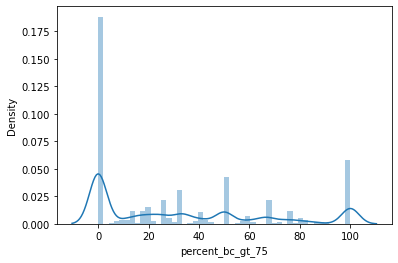


pub_rec_bankruptcies
mean is:  0.12
std is:  0.34
min is:  0.0
max is:  4.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 1.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


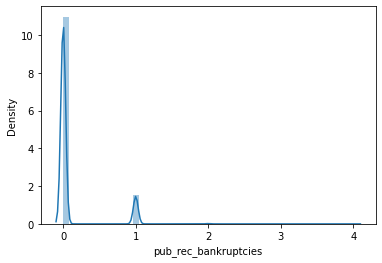


tax_liens
mean is:  0.04
std is:  0.35
min is:  0.0
max is:  52.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


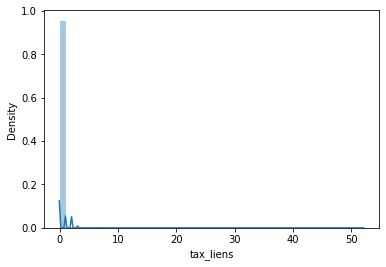


tot_hi_cred_lim
mean is:  185206.32
std is:  188667.61
min is:  0.0
max is:  6057411.0
1% quantile value is: 6500.0
10% quantile value is: 27342.300000000003
90% quantile value is: 426612.79999999993
99% quantile value is: 815387.44


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


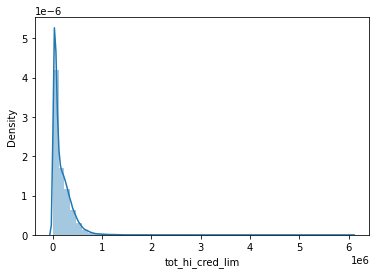


total_bal_ex_mort
mean is:  50930.5
std is:  51907.48
min is:  0.0
max is:  1009178.0
1% quantile value is: 805.2600000000002
10% quantile value is: 8716.300000000001
90% quantile value is: 106401.39999999994
99% quantile value is: 255264.74


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


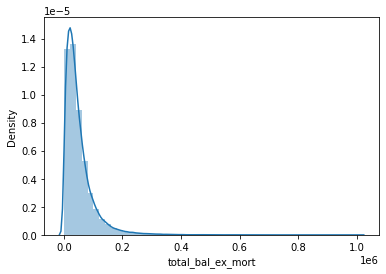


total_bc_limit
mean is:  26957.65
std is:  25827.86
min is:  0.0
max is:  471400.0
1% quantile value is: 0.0
10% quantile value is: 4500.0
90% quantile value is: 58600.0
99% quantile value is: 122800.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


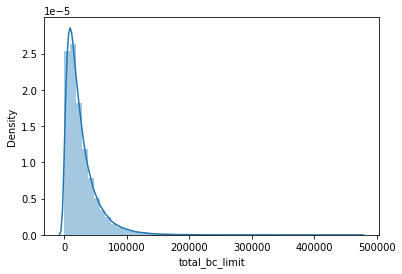


total_il_high_credit_limit
mean is:  45064.53
std is:  47269.26
min is:  0.0
max is:  921338.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 99422.79999999999
99% quantile value is: 222924.80999999994


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


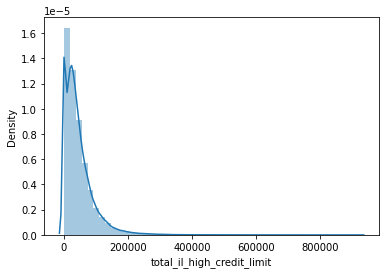


revol_bal_joint
mean is:  34531.57
std is:  28087.75
min is:  0.0
max is:  371153.0
1% quantile value is: 1748.6
10% quantile value is: 8527.0
90% quantile value is: 67995.0
99% quantile value is: 134006.4000000002


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


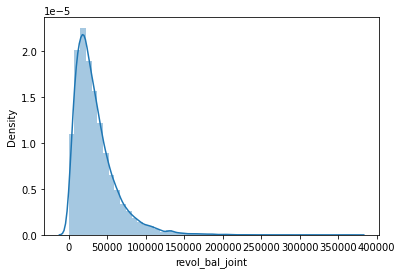

In [17]:
# The fifth group
continous_cols_5 =['num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl','num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
                   'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_30dpd','num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 
                   'pct_tl_nvr_dlq','percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens','tot_hi_cred_lim', 'total_bal_ex_mort', 
                   'total_bc_limit','total_il_high_credit_limit', 'revol_bal_joint',]
for col in continous_cols_5:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    sns.distplot(df[col], label = "univariate analysis on: " + col)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show()
    print()     

sec_app_fico_range_low
mean is:  668.62
std is:  46.7
min is:  540.0
max is:  840.0
1% quantile value is: 550.0
10% quantile value is: 610.0
90% quantile value is: 725.0
99% quantile value is: 790.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


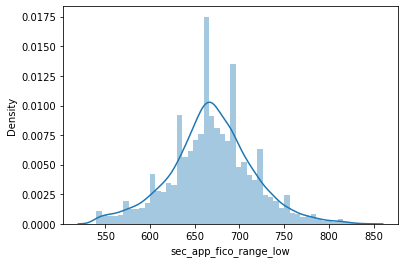


sec_app_fico_range_high
mean is:  672.62
std is:  46.7
min is:  544.0
max is:  844.0
1% quantile value is: 554.0
10% quantile value is: 614.0
90% quantile value is: 729.0
99% quantile value is: 794.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


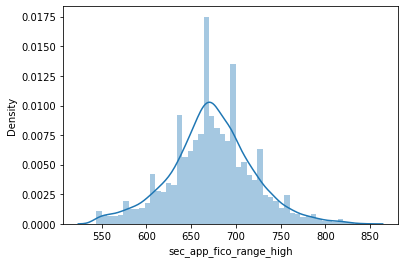


sec_app_inq_last_6mths
mean is:  0.65
std is:  1.02
min is:  0.0
max is:  6.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 2.0
99% quantile value is: 4.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


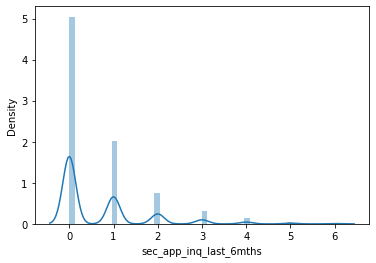


sec_app_mort_acc
mean is:  1.55
std is:  1.79
min is:  0.0
max is:  27.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 4.0
99% quantile value is: 7.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


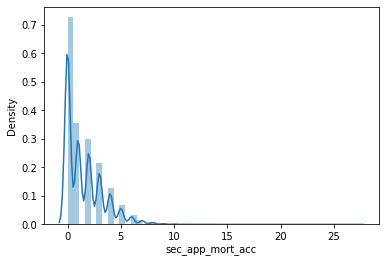


sec_app_open_acc
mean is:  11.62
std is:  6.67
min is:  0.0
max is:  66.0
1% quantile value is: 1.0
10% quantile value is: 4.0
90% quantile value is: 20.0
99% quantile value is: 32.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


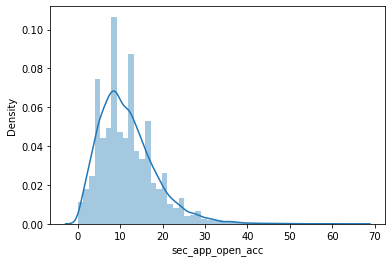


sec_app_revol_util
mean is:  58.68
std is:  25.93
min is:  0.0
max is:  434.3
1% quantile value is: 0.1
10% quantile value is: 22.4
90% quantile value is: 91.5
99% quantile value is: 101.6


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


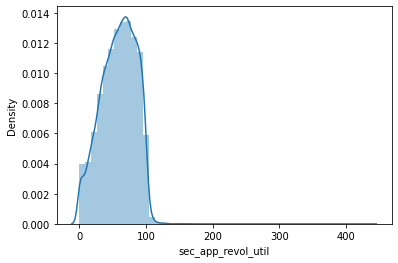


sec_app_open_act_il
mean is:  3.01
std is:  3.25
min is:  0.0
max is:  34.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 6.0
99% quantile value is: 16.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


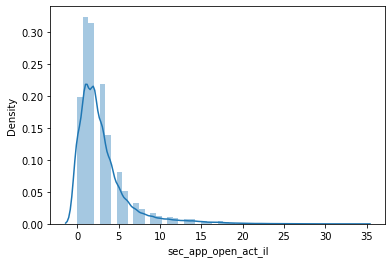


sec_app_num_rev_accts
mean is:  12.77
std is:  8.29
min is:  0.0
max is:  85.0
1% quantile value is: 1.0
10% quantile value is: 4.0
90% quantile value is: 24.0
99% quantile value is: 39.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


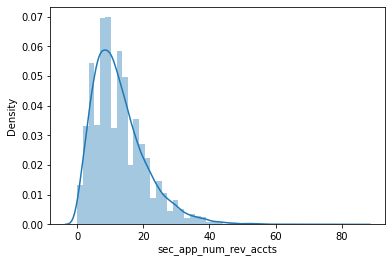


sec_app_chargeoff_within_12_mths
mean is:  0.06
std is:  0.46
min is:  0.0
max is:  17.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 1.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


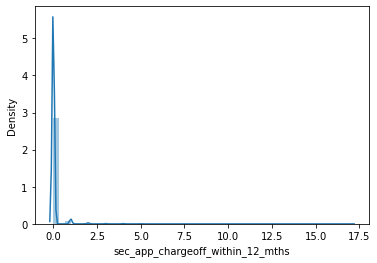


sec_app_collections_12_mths_ex_med
mean is:  0.08
std is:  0.44
min is:  0.0
max is:  15.0
1% quantile value is: 0.0
10% quantile value is: 0.0
90% quantile value is: 0.0
99% quantile value is: 2.0


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


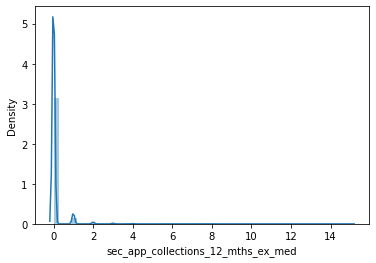


sec_app_mths_since_last_major_derog
mean is:  35.5
std is:  23.92
min is:  0.0
max is:  131.0
1% quantile value is: 0.0
10% quantile value is: 4.0
90% quantile value is: 70.0
99% quantile value is: 81.73999999999978


C:\Users\rhoda\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


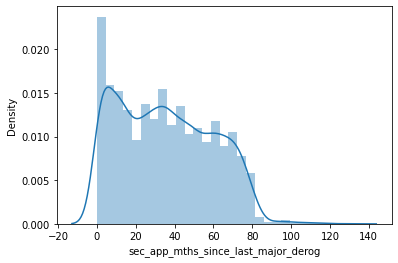

In [18]:
# The sixth group
continous_cols_6 =[ 'sec_app_fico_range_low', 'sec_app_fico_range_high','sec_app_inq_last_6mths', 'sec_app_mort_acc', 'sec_app_open_acc',
                   'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths',
                   'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog']
for col in continous_cols_6:
    print(col)
    print("mean is: ", round(df[col].mean(),2))
    print("std is: ", round(df[col].std(), 2))
    print("min is: ", df[col].min())
    print("max is: ", df[col].max())
    print("1% quantile value is:", df[col].quantile(.01))
    print("10% quantile value is:", df[col].quantile(.1))
    print("90% quantile value is:", df[col].quantile(.9))
    print("99% quantile value is:", df[col].quantile(.99))
    sns.distplot(df[col], label = "univariate analysis on: " + col)
    #plt.savefig("figs/univariate_analysis/" + col + ".png")
    plt.show()
    print()     

In [57]:
df_num['annual_inc'].describe()

count    1.078640e+05
mean     7.854227e+04
std      7.687436e+04
min      0.000000e+00
25%      4.500000e+04
50%      6.500000e+04
75%      9.500000e+04
max      8.365188e+06
Name: annual_inc, dtype: float64

In [64]:
# subset some high annual income people and want to figure out why they need to apply a loan 
# most loans locating in this category do not need second applicant to help them to apply the loan. 
#In addition, some of the loan_amount is really low, is it the concened? 
df_num[df_num['annual_inc']>6.365188e+05]

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,mths_since_last_major_derog,annual_inc_joint,dti_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_fico_range_low,sec_app_fico_range_high,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
627,29600.0,29600.0,29600.0,982.87,1400000.00,7.80,1.0,685.0,689.0,3.0,20.0,NaN,26.0,0.0,100342.0,54.0,729.0,725.0,0.0,NaN,NaN,NaN,0.0,0.0,1990150.0,1.0,5.0,1.0,3.0,8.0,102026.0,42.0,1.0,14.0,36554.0,37.0,236600.0,3.0,0.0,6.0,18.0,79606.0,60290.0,54.7,0.0,0.0,126.0,258.0,4.0,4.0,4.0,4.0,NaN,0.0,20.0,0.0,9.0,10.0,11.0,16.0,10.0,18.0,39.0,10.0,26.0,0.0,0.0,2.0,100.0,36.4,0.0,0.0,2224494.0,235150.0,160600.0,197230.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
836,40000.0,40000.0,40000.0,1218.15,650000.00,6.21,0.0,740.0,744.0,0.0,67.0,NaN,7.0,0.0,0.0,15.0,809.0,805.0,0.0,67.0,NaN,NaN,0.0,0.0,1220662.0,1.0,3.0,1.0,2.0,6.0,37476.0,61.0,0.0,0.0,0.0,54.0,8100.0,0.0,0.0,2.0,3.0,174380.0,5800.0,0.0,0.0,0.0,186.0,157.0,39.0,6.0,1.0,157.0,67.0,7.0,67.0,0.0,0.0,0.0,1.0,4.0,6.0,2.0,7.0,0.0,7.0,0.0,0.0,2.0,93.3,0.0,0.0,0.0,1261703.0,92292.0,5800.0,61987.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2510,28500.0,28500.0,28500.0,884.44,685000.00,9.75,0.0,710.0,714.0,1.0,63.0,NaN,17.0,0.0,317116.0,39.0,709.0,705.0,0.0,NaN,NaN,NaN,0.0,0.0,867112.0,2.0,7.0,1.0,5.0,4.0,193582.0,66.0,1.0,3.0,15464.0,72.0,354600.0,4.0,6.0,1.0,8.0,51007.0,3620.0,90.1,0.0,0.0,295.0,390.0,4.0,4.0,3.0,4.0,NaN,0.0,NaN,0.0,5.0,9.0,5.0,6.0,23.0,9.0,13.0,9.0,17.0,0.0,0.0,2.0,94.7,80.0,0.0,0.0,970304.0,510698.0,36600.0,245704.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3800,39100.0,39100.0,39100.0,1190.74,800000.00,3.13,0.0,835.0,839.0,0.0,NaN,NaN,10.0,0.0,5344.0,20.0,779.0,775.0,0.0,NaN,NaN,NaN,0.0,0.0,771117.0,1.0,2.0,1.0,2.0,4.0,48142.0,42.0,0.0,1.0,3902.0,11.0,133100.0,0.0,0.0,1.0,3.0,77112.0,92792.0,5.4,0.0,0.0,151.0,198.0,23.0,4.0,3.0,23.0,NaN,4.0,NaN,0.0,2.0,3.0,5.0,7.0,6.0,7.0,10.0,3.0,10.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,921730.0,53486.0,98100.0,68630.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3866,20000.0,20000.0,20000.0,602.21,1200000.00,4.26,1.0,760.0,764.0,0.0,9.0,NaN,17.0,0.0,28416.0,23.0,764.0,760.0,0.0,NaN,NaN,NaN,0.0,0.0,1061998.0,0.0,4.0,0.0,2.0,13.0,108104.0,54.0,0.0,0.0,17678.0,32.0,215300.0,1.0,0.0,5.0,2.0,62470.0,166584.0,0.0,0.0,0.0,181.0,200.0,28.0,13.0,2.0,34.0,NaN,7.0,NaN,0.0,2.0,2.0,6.0,8.0,8.0,10.0,12.0,2.0,17.0,0.0,0.0,0.0,95.7,0.0,0.0,0.0,1453811.0,144136.0,195000.0,174109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4695,35000.0,35000.0,35000.0,833.39,700000.00,2.26,1.0,675.0,679.0,1.0,15.0,NaN,3.0,0.0,7.0,15.0,599.0,595.0,0.0,15.0,NaN,NaN,0.0,0.0,141378.0,0.0,2.0,0.0,1.0,22.0,141371.0,75.0,1.0,1.0,7.0,73.0,900.0,4.0,0.0,5.0,2.0,47126.0,893.0,0.8,0.0,0.0,213.0,132.0,9.0,9.0,2.0,9.0,33.0,3.0,29.0,4.0,1.0

In [48]:
df_num['annual_inc'].mean()

78542.26924998153

In [50]:
df_num['annual_inc'].med`ian()

65000.0

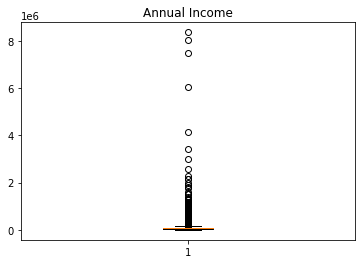

In [54]:
_ = plt.boxplot(df_num['annual_inc'])
_ = plt.title("Annual Income")
plt.show()

<AxesSubplot:ylabel='Density'>

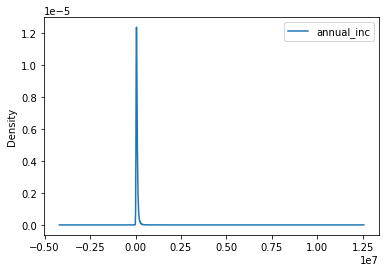

In [56]:
df_num[['annual_inc']].plot.density()